#**MONKEYPOX - MATHEMATICAL MODELING**  
#### Aurélien Vannieuwenhuyze - 2022/08/03 - Mathematics  
##### https://aurelienvannieuwenhuyze.com | https://qstom-it.com  
<img src="https://www.gnu.org/graphics/gplv3-127x51.png"/>

<hr>



#Abstract

Monkeypox is a disease that has been on the rise again across several continents in recent months.(Aout 2022)

This notebook allows you to :
- Visualize the development of the actual disease (2022)  
- Modeling an epidemic with SIR model
- Use the Euler method to create a SIR model
- Use SciPy to create a SIR model
- Understand an SVEIR Model
- Visualize the impact of the use of a vaccine on this disease with the help of mathematical modeling
- Make a tool for epidemic interactive modeling

The modeling work of the Monkeypox disease is based on the scientific publication of
> Usman, S. and
Adamu, I.I. (2017) Modeling the Transmission Dynamics of the Monkeypox Virus
Infection with Treatment and Vaccination
Interventions. Journal of Applied Mathematics and Physics, 5, 2335-2353.
https://doi.org/10.4236/jamp.2017.512191  
https://www.scirp.org/pdf/JAMP_2017121414351920.pdf


**You must read this scientific publication before execute each parts of codes**

<br>

Attention:
This note book was created for educational purposes.
The objectives are as follows:
- Understanding, analysis and implementation of a scientific publication

**The information in this notebook cannot be used for real-life simulations.**



# Datas and python libraries

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pnd

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 9.8 MB/s 
     |████████████████████████████████| 16.7 MB 56.8 MB/s 
     |████████████████████████████████| 6.3 MB 34.5 MB/s 


In [3]:
from scipy.integrate import ode
from scipy.integrate import odeint
from matplotlib.pyplot import figure
import numpy as np

import networkx as nx

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Datas

In [5]:
#Monkey Pox datas
!wget https://raw.githubusercontent.com/owid/notebooks/main/EdouardMathieu/monkeypox/owid-monkeypox-data.csv

--2022-08-04 13:59:01--  https://raw.githubusercontent.com/owid/notebooks/main/EdouardMathieu/monkeypox/owid-monkeypox-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151427 (148K) [text/plain]
Saving to: ‘owid-monkeypox-data.csv’

owid-monkeypox-data 100%[===================>] 147.88K  --.-KB/s    in 0.009s  

2022-08-04 13:59:01 (15.6 MB/s) - ‘owid-monkeypox-data.csv’ saved [151427/151427]



In [6]:
#Gps coordinate by countries
!wget https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv

--2022-08-04 13:59:05--  https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6831 (6.7K) [text/plain]
Saving to: ‘average-latitude-longitude-countries.csv’

average-latitude-lo 100%[===================>]   6.67K  --.-KB/s    in 0s      

2022-08-04 13:59:05 (73.5 MB/s) - ‘average-latitude-longitude-countries.csv’ saved [6831/6831]



# Datas visualization (geopandas and folium)

##Loading datas

In [7]:
datas = pnd.read_csv("owid-monkeypox-data.csv")
datas.head()

,location,date,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
0,Andorra,2022-07-25,1,NaN,1,12.653,12.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,2022-07-26,2,NaN,3,25.306,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,2022-05-27,2,NaN,2,0.044,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,2022-05-28,0,NaN,2,0.000,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,2022-05-29,0,NaN,2,0.000,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
gps = pnd.read_csv("average-latitude-longitude-countries.csv",sep=",")
gps = gps.rename(columns={"Country": "location"})
gps.head(100)

,ISO 3166 Country Code,location,Latitude,Longitude
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17
...,...,...,...,...
95,HR,Croatia,45.17,15.50
96,HT,Haiti,19.00,-72.42
97,HU,Hungary,47.00,20.00
98,ID,Indonesia,-5.00,120.00


## Adding GPS Coordinates

In [9]:
datas_merged = pnd.merge(datas, gps, on="location")
datas_merged.head()

,location,date,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,ISO 3166 Country Code,Latitude,Longitude
0,Andorra,2022-07-25,1,NaN,1,12.653,12.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,42.5,1.5
1,Andorra,2022-07-26,2,NaN,3,25.306,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,42.5,1.5
2,Argentina,2022-05-27,2,NaN,2,0.044,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,-34.0,-64.0
3,Argentina,2022-05-28,0,NaN,2,0.000,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,-34.0,-64.0
4,Argentina,2022-05-29,0,NaN,2,0.000,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,-34.0,-64.0


## France Analysis

In [10]:
france_datas = datas_merged[datas_merged['location']=="France"]

In [11]:
france_datas.head()

,location,date,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,ISO 3166 Country Code,Latitude,Longitude
804,France,2022-05-19,1,NaN,1,0.015,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR,46.0,2.0
805,France,2022-05-20,0,NaN,1,0.000,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR,46.0,2.0
806,France,2022-05-21,0,NaN,1,0.000,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR,46.0,2.0
807,France,2022-05-22,0,NaN,1,0.000,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR,46.0,2.0
808,France,2022-05-23,2,NaN,3,0.030,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR,46.0,2.0


In [12]:
france_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 804 to 879
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         76 non-null     object 
 1   date                             76 non-null     object 
 2   new_cases                        76 non-null     int64  
 3   new_cases_smoothed               70 non-null     float64
 4   total_cases                      76 non-null     int64  
 5   new_cases_per_million            76 non-null     float64
 6   total_cases_per_million          76 non-null     float64
 7   new_cases_smoothed_per_million   70 non-null     float64
 8   new_deaths                       0 non-null      float64
 9   new_deaths_smoothed              0 non-null      float64
 10  total_deaths                     0 non-null      float64
 11  new_deaths_per_million           0 non-null      float64
 12  total_deaths_per_mill

In [13]:
france_datas['date'].min()

'2022-05-19'

In [14]:
france_datas['date'].max()

'2022-08-02'

In [15]:
france_datas.describe()

,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,Latitude,Longitude
count,76.000000,70.000000,76.000000,76.000000,76.000000,70.000000,0.0,0.0,0.0,0.0,0.0,0.0,76.0,76.0
mean,29.486842,28.255143,594.565789,0.437368,8.818487,0.419114,NaN,NaN,NaN,NaN,NaN,NaN,46.0,2.0
std,80.758156,26.154774,652.774373,1.197812,9.681922,0.387929,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
min,0.000000,0.860000,1.000000,0.000000,0.015000,0.013000,NaN,NaN,NaN,NaN,NaN,NaN,46.0,2.0
25%,0.000000,6.467500,62.500000,0.000000,0.927000,0.095750,NaN,NaN,NaN,NaN,NaN,NaN,46.0,2.0
50%,0.000000,21.710000,331.000000,0.000000,4.909000,0.322000,NaN,NaN,NaN,NaN,NaN,NaN,46.0,2.0
75%,3.750000,31.860000,908.250000,0.055750,13.470750,0.473000,NaN,NaN,NaN,NaN,NaN,NaN,46.0,2.0
max,525.000000,93.430000,2241.000000,7.787000,33.238000,1.386000,NaN,NaN,NaN,NaN,NaN,NaN,46.0,2.0


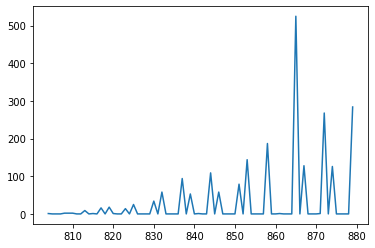

In [16]:
plt.plot(france_datas["new_cases"])

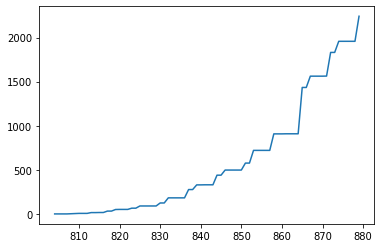

In [17]:
plt.plot(france_datas["total_cases"])

## Geopandas and Folium visualization

### Group by location, aggregation by total_cases


In [18]:
grouped_datas = datas_merged.groupby(['location','Longitude','Latitude'])['total_cases'].agg('sum')
grouped_datas = grouped_datas.to_frame()
grouped_datas = grouped_datas.add_suffix('_Count').reset_index()
grouped_datas.head()

,location,Longitude,Latitude,total_cases_Count
0,Andorra,1.50,42.50,4
1,Argentina,-64.00,-34.00,424
2,Australia,133.00,-27.00,1080
3,Austria,13.33,47.33,2978
4,Barbados,-59.53,13.17,1


### Visualization

In [19]:
#Geo pandas Geometry Points creation
import geopandas
gdf = geopandas.GeoDataFrame(grouped_datas, geometry=geopandas.points_from_xy(grouped_datas.Longitude, grouped_datas.Latitude))

gdf.head()

,location,Longitude,Latitude,total_cases_Count,geometry
0,Andorra,1.50,42.50,4,POINT (1.50000 42.50000)
1,Argentina,-64.00,-34.00,424,POINT (-64.00000 -34.00000)
2,Australia,133.00,-27.00,1080,POINT (133.00000 -27.00000)
3,Austria,13.33,47.33,2978,POINT (13.33000 47.33000)
4,Barbados,-59.53,13.17,1,POINT (-59.53000 13.17000)


In [20]:
import folium
from folium import plugins

map = folium.Map(location = [15,30], tiles='Cartodb dark_matter', zoom_start = 2)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map

# Modeling an epidemic

## SIR model

### Understanding the SIR model

> For more information on this part, i invite you to read this paper : https://www.tnstate.edu/mathematics/mathreu/filesreu/GroupProjectSIR.pdf

The SIR model divides the population into three compartments

- S : Susceptible (Not yet infected)
- I : Invected
- R : Recovered



Each compartment is initialized with **percentage** of population it contains

- S : 300 (30%)
- I : 500 (50%)
- R : 200 (20%) 

The total population corresponds to S+I+R = 300+500+200 = 1000 = 100%

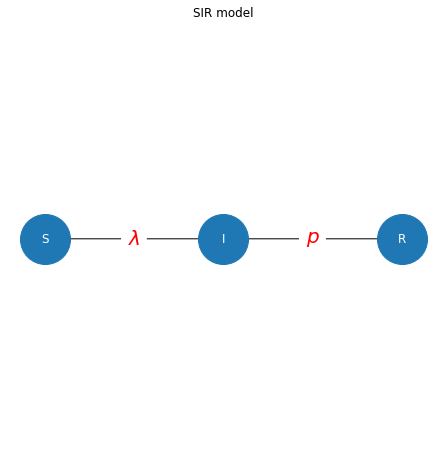

In [23]:
G = nx.DiGraph()
G.add_edges_from([('S', 'I'), ('I', 'R')])

pos = {'S': [0,0],
       'I': [1,0],
       'R': [2,0],
       }

plt.figure(1,figsize=(6,6))
ax = plt.axes([0,0,1,1], frameon=False)
nx.draw_networkx_labels(G, pos,font_color="white")
nx.draw_networkx_nodes(G, pos, node_size = 2500)
nx.draw_networkx_edges(G, pos, arrows=True)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={('S', 'I'): '$\lambda$', 
                 ('I', 'R'): '$p$', 
                 },
    font_color='red',
    font_size=20
)
plt.title("SIR model")
plt.show()


**The model then gives rules** explaining **how these percentages change over time** - that is, essentially "how fast" a person will on average move from class S to class I (being infected), and then from class I to class R (being cured). For the simplest SIR models, the following rules are used:

$\frac{dS(t)}{dt} = -\lambda I(t)S(t)$. 

**The proportion of susceptible (i.e. not yet infected) individuals decreases in proportion to the product of the proportion of susceptible and infected individuals**.   
The underlying intuition is that the more infected individuals there are, the more likely it is that a susceptible individual will be infected.   
The $I(t)S(t)$ product measures the "encounters" between infected and susceptible individuals.   
This equation is regulated by a parameter $\lambda$ that depends in practice on many factors: contagiousness of the disease, social distancing measures, confinement.   
$\lambda$ is called the **strength of infection**. If $\lambda=0$, it means that there is no contagion at all: no new infected individuals appear. The greater the $\lambda$, the greater the contagion.

$\frac{dR(t)}{dt} = \rho I(t)$. 

This means that **the rate of recovered individuals varies in proportion to the rate of infected individuals** ($\frac{dR(t)}{dt}$ being the rate of change of R - called its derivative in mathematics).   
In other words, within a small time interval, **a certain fixed proportion of those infected will be recovered**.   
This proportion is regulated by the parameter $\rho$, called the **recover rate**:  
if $\rho=0$, it means that nobody is revovered - the proportion of individuals in R does not change. If $\rho$ is "large", it means that the recover is "fast".


$\frac{dI(t)}{dt} = \lambda I(t)S(t) - \rho I(t)$. 

**The variation of infected individuals corresponds to new arrivals from the susceptible compartment (infection), and departures to the recovered compartment (R).**

We then obtain what is called **a system of differential equations**

\begin{equation}
\left\{
    \begin{array}{ll}
        \frac{dS(t)}{dt} = -\lambda I(t)S(t)  \\
        \frac{dI(t)}{dt} = \lambda I(t)S(t) - \rho I(t) \\
        \frac{dR(t)}{dt} = \rho I(t)
    \end{array}
\right.
\end{equation}

**In this model, we assume that total population is constant.**

>In mathematics, a differential equation is an equation that relates one or more unknown functions and their derivatives  (Unknows are equations not values)  
> **A differential equation is an equation that describes the variation of a quantity over time**.     
> A system simply means the presence of several equations.

This system can be resolved by the **Euler's method**

#### Using number of individuals in each population classes instead of percentages

As mentioned, the previous differential equations require specifying the percentage of population in each compartment S,I,R

The differential equations below allow to use the number of individuals per compartment

\begin{equation}
\left\{
    \begin{array}{ll}
        \frac{dS(t)}{dt} = -\frac{\lambda S(t)}{N}I(t)  \\
        \frac{dI(t)}{dt} = \frac{\lambda S(t)}{N} - \rho I(t) \\
        \frac{dR(t)}{dt} = \rho I(t)
    \end{array}
\right.
\end{equation}

### Euler's method for solving the SIR model 

The idea of Euler's Method: If we have a "slope formula," i.e., a way to calculate  dy/dt  at any point  (t,y),  then we can generate a sequence of y-values, (In our case, the "slopes-formulas" are $\frac{dS(t)}{dt}$, $\frac{dI(t)}{dt}$, $\frac{dR(t)}{dt}$)

y starting from a given  $y0$  and computing each rise as slope x run. That is, $y_0, y_1,y_2...$

\begin{equation}
y_n = y_{n-1} + slope_{n-1} + \Delta t
\end{equation}

$\Delta t$ is a suitably small step size in the time domain. 

Euler equations:  
\begin{equation}
Sn = S_{n-1} + (\frac{dS(t)}{dt})_{n-1}*\Delta t
\end{equation}
\begin{equation}
Sn = S_{n-1} + (-\lambda S_{n-1}I_{n-1})*\Delta t
\end{equation}

<br><br>
\begin{equation}
In = I_{n-1} + (\frac{dI(t)}{dt})_{n-1}*\Delta t
\end{equation}
\begin{equation}
In = I_{n-1} + (-\lambda S_{n-1}I_{n-1} - \rho I_{n-1})*\Delta t
\end{equation}


<br><br>
\begin{equation}
Rn = R_{n-1} + (\frac{dR(t)}{dt})_{n-1}*\Delta t
\end{equation}
\begin{equation}
Rn = R_{n-1} + (\rho I_{n-1})*\Delta t
\end{equation}

In [24]:
#Model parameters
S_init = 30
I_init = 50
R_init = 20
Lambda = 0.60
rho = 0.20

#Convert initials values to percentage (Necessary for the calculation)
N = S_init + I_init + R_init
S_init = S_init / N
I_init = I_init / N
R_init = R_init / N

#Modeling duration
days = 100
deltaT = 1

#Initialization of results
S = np.zeros(days+1)
I = np.zeros(days+1)
R = np.zeros(days+1)

#On the first day of the modeling, each compartment has its initial value
S[0] = S_init
I[0] = I_init
R[0] = R_init

#Euler's Method
def EulerMethod(S,I,R,days,Lambda,Rho,deltaT):
  for day in range(days):
    n=day+1
    S[n] = S[n-1] + (-Lambda*S[n-1]*I[n-1])*deltaT
    I[n] = I[n-1] + (Lambda*S[n-1]*I[n-1] - rho*I[n-1])*deltaT
    R[n] = R[n-1] + (rho*I[n-1])*deltaT

  return S,I,R

#Modeling with Euler's method
S,I,R = EulerMethod(S,I,R,days,Lambda,rho,deltaT)

#Convert percent values of S, I , R return by the Euler's method to real values
S = np.multiply(S,N)
I = np.multiply(I,N)
R = np.multiply(R,N)

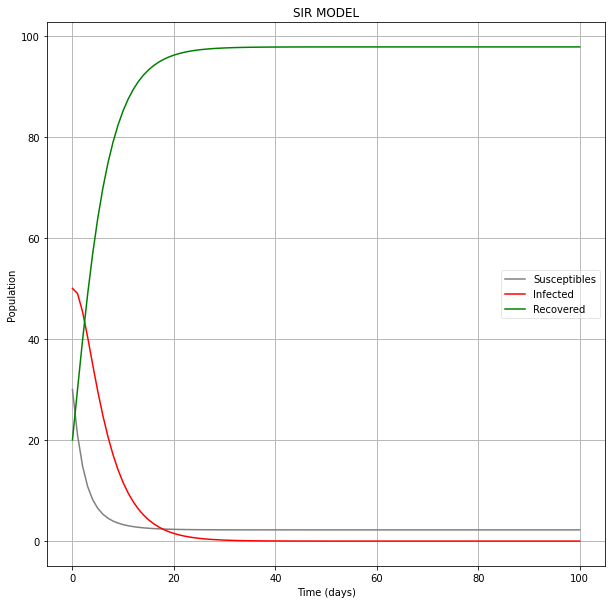

In [25]:
plt.figure(figsize=(10,10))
titre = "SIR Model"
plt.title(titre.upper())
plt.autoscale(enable=True, axis='both', tight=None)
plt.plot(S,'grey',label="Susceptibles")
plt.plot(I,'red',label="Infected")
plt.plot(R,'green',label="Recovered")
plt.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')

plt.xlabel('Time (days)')
plt.ylabel('Population')
legend = plt.legend()
legend.get_frame().set_alpha(0.5)

plt.show()


In [34]:
def getDatas(day):
    x = ['Population']
    Sday = [S[day]]
    Iday = [I[day]]
    Rday = [R[day]]

    print("S (number)=",Sday[0])
    print("I (number)=",Iday[0])
    print("R (number)=",Rday[0])
  
    plt.figure(figsize=(10,10))
    plt.bar(x, Sday, color='grey',label="Population in S (Number of individuals)")
    plt.bar(x, Iday, bottom=Sday, color='r',label="Population in I (Number of individuals)")
    plt.bar(x, Rday, bottom=Iday, color='g',label="Population in R (Number of individuals)")
    plt.legend()
    plt.show()
    
interact(getDatas, day=widgets.IntSlider(min=1, max=days, step=1, value=1));

interactive(children=(IntSlider(value=1, description='day', min=1), Output()), _dom_classes=('widget-interact'…

### Using odeint method (Ordinary Differential Equation) from Scipy package

> Documentation of the method : https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

\begin{equation}
\left\{
    \begin{array}{ll}
        \frac{dS(t)}{dt} = -\lambda I(t)S(t)  \\
        \frac{dI(t)}{dt} = \lambda I(t)S(t) - \rho I(t) \\
        \frac{dR(t)}{dt} = \rho I(t)
    \end{array}
\right.
\end{equation}

In [35]:
#Function for modeling
def SIRmodel(y,t,Lambda,rho):
    S,I,R = y #Values to modeling 
    Smodeling = -Lambda*I*S
    Imodeling = Lambda*I*S - rho*I
    Rmodeling = rho*I

    return Smodeling,Imodeling,Rmodeling


#parameters
#We use percentages for each classes, because we use differential equations requiring this format
#CF: "Using number of individual in each population class instead of percentage" of the note book 
S= 0.3
I= 0.5
R= 0.2
days = np.linspace(0,100,100)
Lambda = 0.60
rho = 0.20

#Using Odeint for modeling
modeling = odeint(SIRmodel,
                   [S,I,R], #y parameters of the SIR fonction (Subpopulation to be modelized)
                   days,#t parameter of the SIR function (numbers of days in our case)
                   args=(Lambda,rho) #all parameters used for modeling
                   )


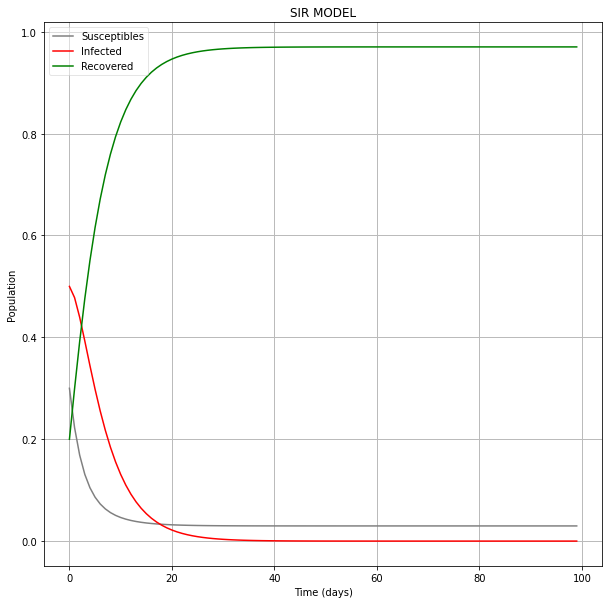

In [36]:
S,I,R = modeling.T

plt.figure(figsize=(10,10))
titre = "SIR Model"
plt.title(titre.upper())
plt.autoscale(enable=True, axis='both', tight=None)
plt.plot(S,'grey',label="Susceptibles")
plt.plot(I,'red',label="Infected")
plt.plot(R,'green',label="Recovered")
plt.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')

plt.xlabel('Time (days)')
plt.ylabel('Population')
legend = plt.legend()
legend.get_frame().set_alpha(0.5)

plt.show()

# Modeling the transmission dynamic of the Monkeypox with treatment and vaccination interventions

This work is based on: 

> Usman, S. and
Adamu, I.I. (2017) Modeling the Transmission Dynamics of the Monkeypox Virus
Infection with Treatment and Vaccination
Interventions. Journal of Applied Mathematics and Physics, 5, 2335-2353.
https://doi.org/10.4236/jamp.2017.512191  
https://www.scirp.org/pdf/JAMP_2017121414351920.pdf

## Description of the SVEIR compartmental model 

The SVEIR model is an example of a compartmental model, i.e. the population is divided into several categories.
For a given population, we study the size of five sub-populations over time t

The model explained in the paper divides the host population into two; 
- The non-human primates and/or some wild rodents, 
- The humans host population

**These two populations are linked because the human is contaminated by the non-human class**

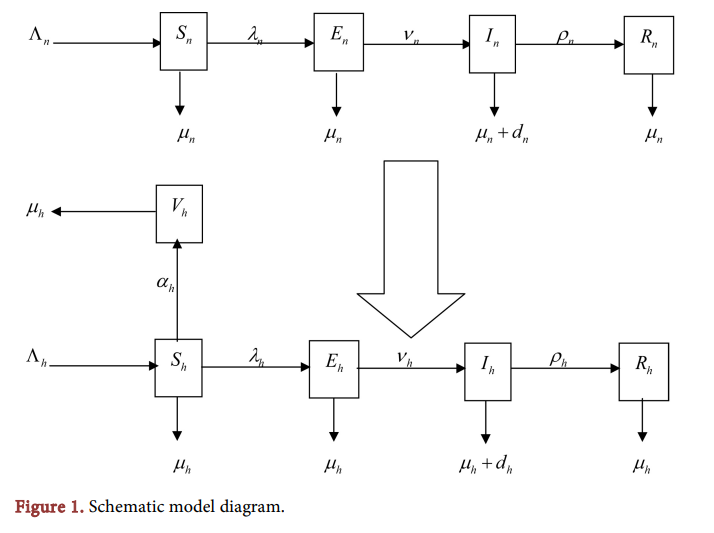

## Name of model parameters

### Non-human population (monkey)

\begin{equation}
n = \text{ Non-human}
\end{equation}

\begin{equation}
N_n = \text{ Initial population of non-human}
\end{equation}

\begin{equation}
S_n = \text{ Susceptible subpopulation}
\end{equation}

\begin{equation}
E_n = \text{Exposed/Latent subpopulation}
\end{equation}

\begin{equation}
I_n = \text{Infected subpopulation}
\end{equation}

\begin{equation}
R_n = \text{Recovered subpopulation}
\end{equation}

<b>Informations<b>

\begin{equation}
\Lambda_n = \text{Constant birth rate}
\end{equation}




Compartments transitions parameters

\begin{equation}
\lambda_n = \text{Transition rate from Susceptible to Expected }
\end{equation}

\begin{equation}
\lambda_n = \beta_{n1} \frac{I_n}{N_n}
\end{equation}

\begin{equation}
\beta_{n1} = \text{is the product of effective contact rate and probability of the non-human primate getting infected per contact}
\end{equation}

\begin{equation}
v_n = \text{Transition rate from Exposed to Infected}
\end{equation}
\begin{equation}
d_n = \text{Death rate after infection}
\end{equation}
\begin{equation}
\rho_n = \text{Transition rate from Infected to Recovered}
\end{equation}
\begin{equation}
\mu_n = \text{Natural mortality rate}
\end{equation}



### Human population

\begin{equation}
h = \text{human}
\end{equation}

\begin{equation}
N_h = \text{ Initial population of human}
\end{equation}

\begin{equation}
S_h = \text{ Susceptible subpopulation}
\end{equation}

\begin{equation}
V_h = \text{ Vaccinated subpopulation}
\end{equation}

\begin{equation}
E_n = \text{Exposed/Latent subpopulation}
\end{equation}

\begin{equation}
I_n = \text{Infected subpopulation}
\end{equation}

\begin{equation}
R_n = \text{Recovered subpopulation}
\end{equation}

<b>Informations<b>

\begin{equation}
\Lambda_h = \text{Constant birth and migration rate}
\end{equation}



Compartments transitions parameters

\begin{equation}
\lambda_h = \text{Transition rate between Susceptible to Exposed }
\end{equation}

\begin{equation}
\lambda_h = \beta_{n2} \frac{I_n}{N_n} \beta_{h}\frac{I_h}{N_h}
\end{equation}

>This introduces a dependency of the non-human and human models, because the parameters $I_n$ and $N$, belonging to the non-human model are used in the human model.

> This allows to take into account the human contamination by the animal

\begin{equation}
\beta_{n2} = \text{Is the product of the effective contact rate and probability of the }  
\end{equation}
\begin{equation}
\text {human being infected per contact with an infectious non-human primate animal}
\end{equation}
<br>


\begin{equation}
\beta_{h} = \text{Is the product of the effective contact rate and the probability of the human being infected with monkeypox virus}
\end{equation}
\begin{equation}
\text{after getting into contact with an infectious human per contact}
\end{equation}

<br>
 
\begin{equation}
\alpha_n = \text{Vaccination transition rate between Susceptible to Vaccined}
\end{equation}

\begin{equation}
v_h = \text{Transition rate from Exposed to Infected}
\end{equation}
\begin{equation}
d_h = \text{Death rate after infection}
\end{equation}
\begin{equation}
\rho_h = \text{Transition rate from Infected to Recovered}
\end{equation}
\begin{equation}
\mu_h = \text{Natural mortality rate}
\end{equation}




## Differentials equations and modeling

The derivatives allow us to know the variation (i.e. whether it is increasing or decreasing) of the functions S, V,E, I and R as a function of time t, in order to describe their evolution over time.

In [41]:
#Period of modelisation : 150 Months
months = np.linspace(0,150,150)



```
# Ce texte est au format code
```

### Non human population

#### Parameters


\begin{equation}
  \Lambda_n = 0.2
\end{equation}
\begin{equation}
  \mu_n = 0.1
\end{equation}
\begin{equation}
  d_n = 0.2
\end{equation}
\begin{equation}
  \rho_n = 0.3
\end{equation}
\begin{equation}
  v_n = 0.3
\end{equation}
\begin{equation}
  \beta_{n1} = 0.0027
\end{equation}
\begin{equation}
  \beta_{n2} = 0.00252
\end{equation}
<br>

In [38]:
Lambda_n = 0.2
mu_n = 0.1
d_n = 0.2
rho_n=0.3
v_n = 0.3
beta_n1 = 0.0027
beta_n2= 0.00252



\begin{equation}
  S_n = 250
\end{equation}
\begin{equation}
  E_n = 125
\end{equation}
\begin{equation}
  I_n = 75
\end{equation}
\begin{equation}
  R_n = 50
\end{equation}
\begin{equation}
  N_n = S_n + E_n + I_n + R_n
\end{equation}

<br>


In [39]:
S_n = 250
E_n = 125
I_n = 75
R_n = 50
N_n = S_n+E_n+I_n+R_n

#### Susceptible non-human subpopulation differential equation

\begin{equation}
  \frac{dS_n(t)}{dt} = \Lambda_n - (\mu_n+\lambda_n)S_n(t)
\end{equation}

#### Exposed non-human subpopulation differential equation

\begin{equation}
  \frac{dE_n(t)}{dt} = \lambda_nS_n(t)-(\mu_n+v_n)E_n(t)
\end{equation}

#### Infected non-human subpopulation differential equation

\begin{equation}
  \frac{dI_n(t)}{dt} = v_nE_n(t)-(\mu_n+d_n+p_n)I_n(t)
\end{equation}

#### Recovered non-human subpopulation differential equation

\begin{equation}
  \frac{dR_n(t)}{dt} = \rho_nI_n-\mu_nR_n(t)
\end{equation}

#### SEIR Modeling for non-human population

In [42]:
def SEIR(y,t,Lambda_n,mu_n,d_n,rho_n,v_n,beta_n1,N_n):

  S_n,E_n,I_n,R_n = y

  lambda_n = beta_n1*(I_n/N_n)

  S_nModeling = Lambda_n-(mu_n+lambda_n)*S_n
  E_nModeling = lambda_n*S_n-(mu_n+v_n)*E_n
  I_nModeling = v_n*E_n-(mu_n+d_n+rho_n)*I_n
  R_nModeling = rho_n*I_n - mu_n*R_n

  return S_nModeling,E_nModeling,I_nModeling,R_nModeling


NonHumanModeling = odeint(SEIR,
                   [S_n,E_n,I_n,R_n], #y parameters of the SEIR fonction (Subpopulation to be modelized)
                   months,#t parameter of the SEIR function (150 months in our case)
                   args=(Lambda_n,mu_n,d_n,rho_n,v_n,beta_n1,N_n) #all parameters used for modelisation
                   )

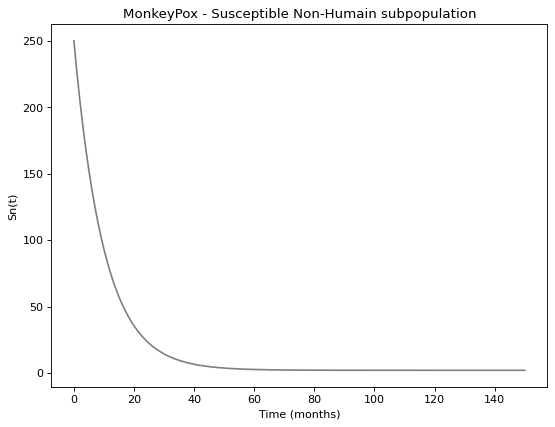

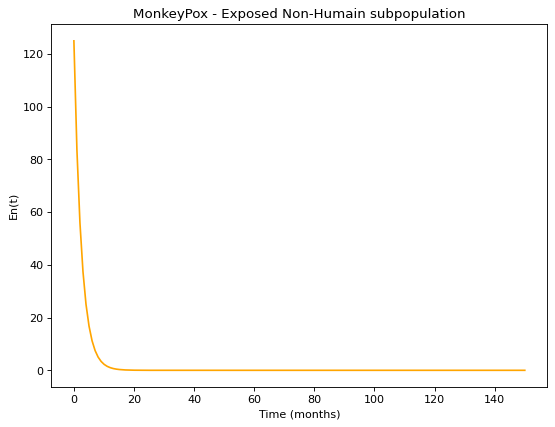

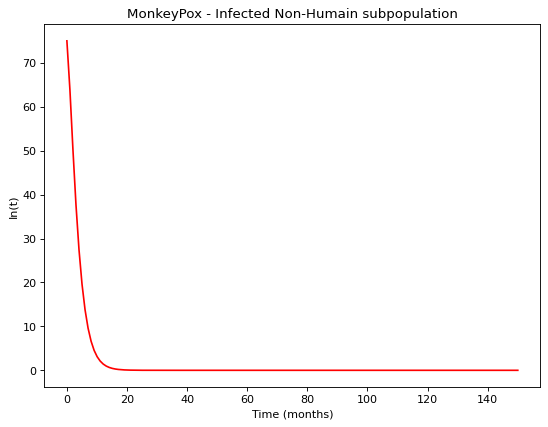

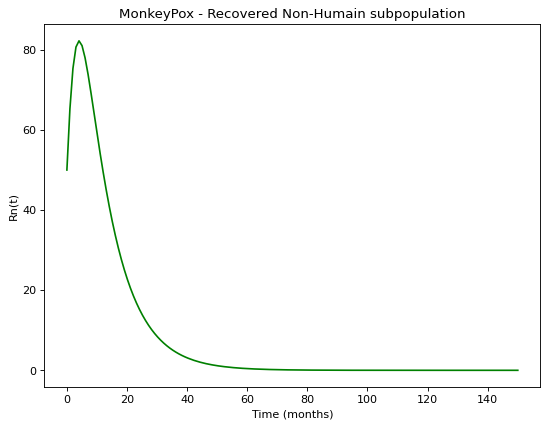

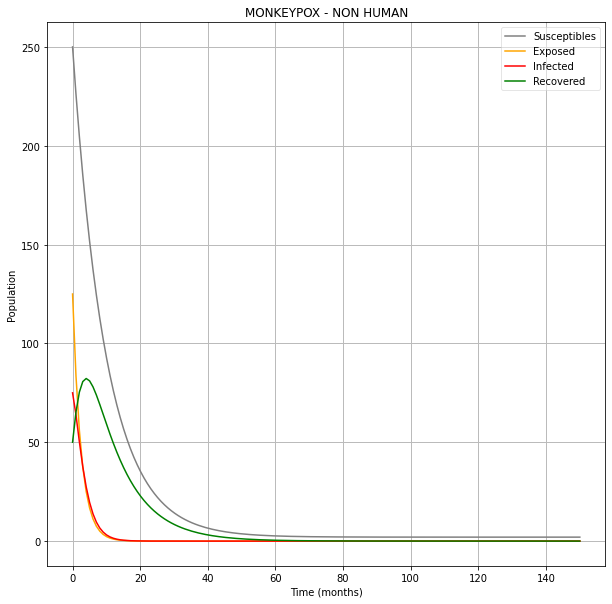

In [43]:
SnModeling, EnModeling, InModeling, RnModeling = NonHumanModeling.T


figure(figsize=(8, 6), dpi=80)
plt.plot(months,SnModeling,'grey',label="Susceptibles")
plt.title("MonkeyPox - Susceptible Non-Humain subpopulation")
plt.ylabel("Sn(t)")
plt.xlabel("Time (months)")
plt.show()

figure(figsize=(8, 6), dpi=80)
plt.plot(months,EnModeling,'orange',label="Exposed")
plt.title("MonkeyPox - Exposed Non-Humain subpopulation")
plt.ylabel("En(t)")
plt.xlabel("Time (months)")
plt.show()

figure(figsize=(8, 6), dpi=80)
plt.plot(months,InModeling,'red',label="Exposed")
plt.title("MonkeyPox - Infected Non-Humain subpopulation")
plt.ylabel("In(t)")
plt.xlabel("Time (months)")
plt.show()

figure(figsize=(8, 6), dpi=80)
plt.plot(months,RnModeling,'green',label="Exposed")
plt.title("MonkeyPox - Recovered Non-Humain subpopulation")
plt.ylabel("Rn(t)")
plt.xlabel("Time (months)")
plt.show()


plt.figure(figsize=(10,10))
titre = "Monkeypox - Non human"
plt.title(titre.upper())
plt.autoscale(enable=True, axis='both', tight=None)
plt.plot(months,SnModeling,'grey',label="Susceptibles")
plt.plot(months,EnModeling,'orange',label="Exposed")
plt.plot(months,InModeling,'red',label="Infected")
plt.plot(months,RnModeling,'green',label="Recovered")
plt.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')

plt.xlabel('Time (months)')
plt.ylabel('Population')
legend = plt.legend()
legend.get_frame().set_alpha(0.5)

plt.show()

#### R0 (Reproduction rate) for non-human

> The reproduction rate $R0$ is the average number of secondary cases produced by an infectious individual during its period of infection.

Impact on the $I(t)$ curve :

> **if $R0$>1, then $I(t)$ grows, reaches its maximum and then decreases to 0 when t tends to +∞: it is an epidemic**.  
Otherwise, $I(t)$ decreases directly to 0 when $t$ tends to +∞: there is no epidemic.

\begin{equation}
R_{0,n} = \frac{v_n\beta_{n1}}{(\mu_n+d_n+\rho_n)*(\mu_n+v_n)}
\end{equation}

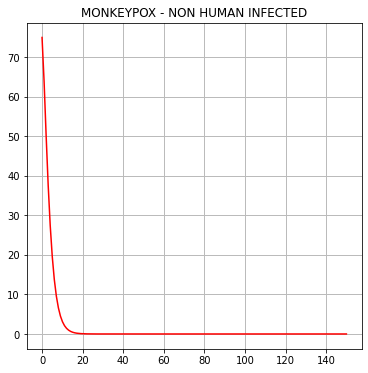

In [50]:
plt.figure(figsize=(6,6))
titre = "Monkeypox - Non human Infected"
plt.title(titre.upper())
plt.plot(months,InModeling,'red',label="Infected")
plt.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')

$I(t)$ decrease directly there is non epidemic

In [89]:
R0_n = (v_n*beta_n1) / ((mu_n+d_n+rho_n)*(mu_n+v_n))
print("R0 for non-human",R0_n)

R0 for non-human 0.0033749999999999995


In [88]:
if(R0_n < 1 ):
  print("No epidemic")
else:
  print("Epidemic !!")

No epidemic


### Human population with vaccine treatment

#### Parameters

\begin{equation}
  \Lambda_h = 0.029
\end{equation}
\begin{equation}
  \mu_h = 0.02
\end{equation}
\begin{equation}
  d_h = 0.1
\end{equation}
\begin{equation}
  \rho_h = 0.83
\end{equation}
\begin{equation}
  v_h = 0.095
\end{equation}
\begin{equation}
  \alpha_h = 0.1
\end{equation}
\begin{equation}
  \beta_{n2} = 0.00252
\end{equation}
\begin{equation}
  \beta_{h} = 0.000063
\end{equation}
<br>

In [54]:
Lambda_h = 0.029
mu_h = 0.02
d_h = 0.1
rho_h=0.83
v_h = 0.095
alpha_h= 0.1
beta_n2= 0.00252
beta_h = 0.000063

\begin{equation}
  S_h = 8000
\end{equation}
\begin{equation}
  V_h = 5000
\end{equation}
\begin{equation}
  E_h = 3000
\end{equation}
\begin{equation}
  I_h = 2000
\end{equation}
\begin{equation}
  R_h = 2000
\end{equation}
\begin{equation}
  N_h = S_h + V_h+ E_h + I_h + R_h
\end{equation}

<br>


In [56]:
S_h = 8000
V_h = 5000
E_h = 3000
I_h = 2000
R_h = 2000
N_h = S_h+V_h+E_h+I_h+R_h

#### Susceptible human subpopulation differential equation

\begin{equation}
  \frac{dS_h(t)}{dt} = \Lambda_h-(\mu_h+\lambda_h+\alpha_h)S_h(t)
\end{equation}


#### Vaccined human subpopulation differential equation

\begin{equation}
  \frac{dV_h(t)}{dt} = \alpha_hS_h(t)-\mu_hV_h(t)
\end{equation}

#### Exposed human subpopulation differential equation

\begin{equation}
  \frac{dV_h(t)}{dt} = \lambda_hS_h(T)-(\mu_h+v_h)E_h(t)
\end{equation}

#### Infected human subpopulation differential equation

\begin{equation}
  \frac{dI_h(t)}{dt} = v_hE_h(t)-(u_h+d_h+\rho_h)I_h(t)
\end{equation}

#### Recovered humain subpopulation differential equation

\begin{equation}
  \frac{dR_h(t)}{dt} = \rho_hI_h(t)-\mu_hR_h(t)
\end{equation}

#### SVEIR Modeling (with vaccine) for human population

Do not forget that the parameter needs to take into account the sub-population of infected non-human individuals.  
This population In, evolves with time.   
**Therefore, we must take into account the modeling of the non-human population in the human modeling**

In [59]:
def SVEIR(y,t,Lambda_n,mu_n,d_n,rho_n,v_n,beta_n1,N_n,Lambda_h,mu_h,d_h,rho_h,v_h,alpha_h,beta_n2,beta_h,N_h):

  S_n,E_n,I_n,R_n,S_h,V_h,E_h,I_h,R_h = y

  #Non Human modelisation
  lambda_n = beta_n1*(I_n/N_n)
  S_nModeling = Lambda_n-(mu_n+lambda_n)*S_n
  E_nModeling = lambda_n*S_n-(mu_n+v_n)*E_n
  I_nModeling = v_n*E_n-(mu_n+d_n+rho_n)*I_n
  R_nModeling = rho_n*I_n - mu_n*R_n

  #Human modelisation
  lambda_h = beta_n2*(I_n/N_n)+beta_h*(I_h/N_h) #Use I_n (non human infected)

  S_hModeling = Lambda_h-(mu_h+lambda_h+alpha_h)*S_h
  V_hModeling = alpha_h*S_h - mu_h*V_h
  E_hModeling = lambda_h*S_h-(mu_h+v_h)*E_h
  I_hModeling = v_h*E_h-(mu_h+d_h+rho_h)*I_h
  R_hModeling = rho_h*I_h - mu_h*R_h

  return S_nModeling,E_nModeling,I_nModeling,R_nModeling,S_hModeling,V_hModeling,E_hModeling,I_hModeling,R_hModeling


HumanModeling = odeint(SVEIR,
                   [S_n,E_n,I_n,R_n,S_h,V_h,E_h,I_h,R_h], #y parameters of the SVEIR fonction (Subpopulation to be modelized)
                   months,#t parameter of the SEIR function (150 months in our case)
                   args=(Lambda_n,mu_n,d_n,rho_n,v_n,beta_n1,N_n,Lambda_h,mu_h,d_h,rho_h,v_h,alpha_h,beta_n2,beta_h,N_h) #all parameters used for modelisation
                   )

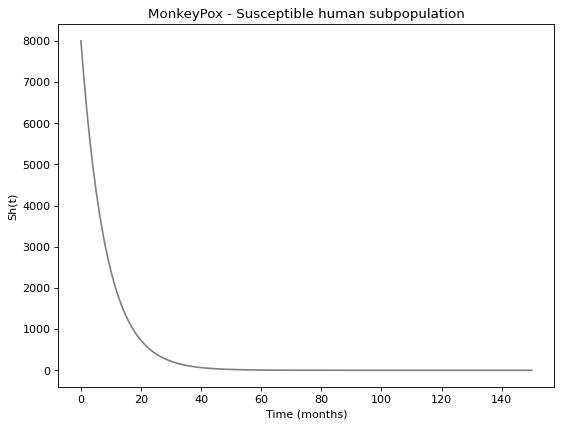

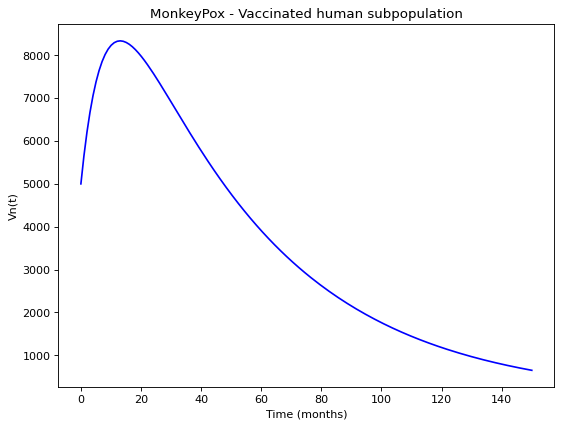

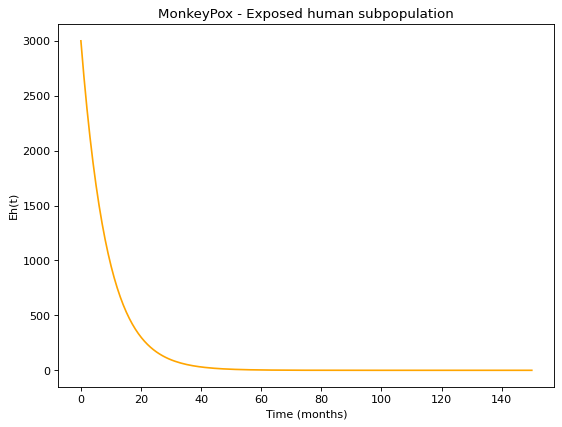

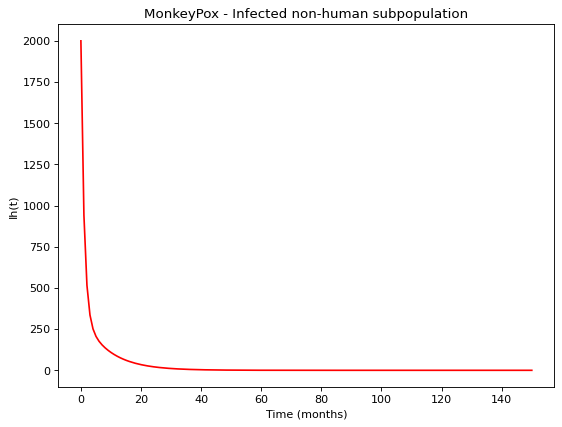

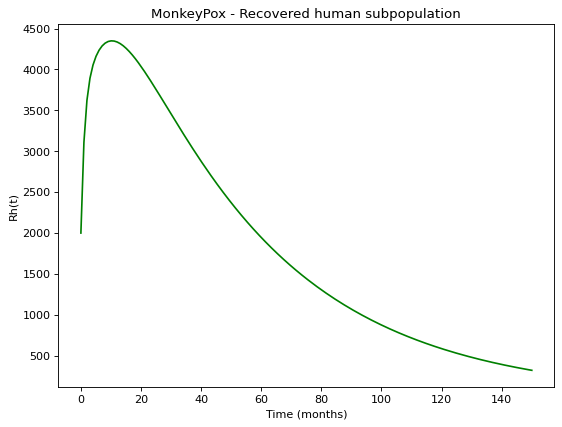

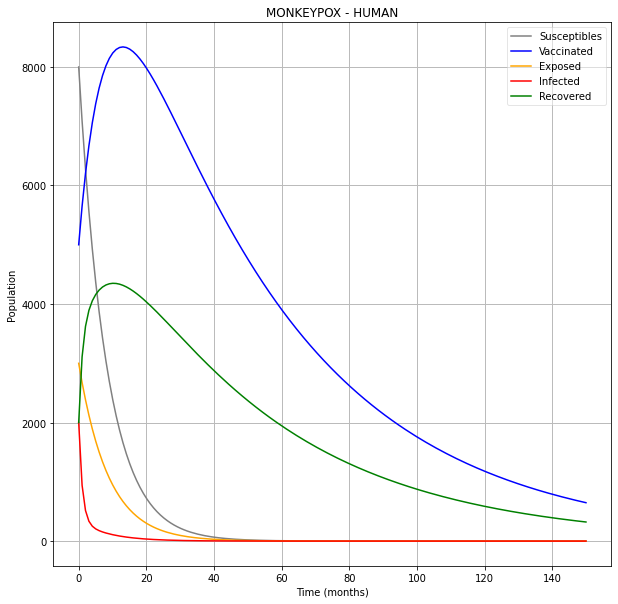

In [60]:
SnModeling, EnModeling, InModeling, RnModeling,ShModeling, VhModeling,EhModeling, IhModeling, RhModeling = HumanModeling.T


figure(figsize=(8, 6), dpi=80)
plt.plot(months,ShModeling,'grey',label="Susceptibles")
plt.title("MonkeyPox - Susceptible human subpopulation")
plt.ylabel("Sh(t)")
plt.xlabel("Time (months)")
plt.show()

figure(figsize=(8, 6), dpi=80)
plt.plot(months,VhModeling,'blue',label="Vaccinated")
plt.title("MonkeyPox - Vaccinated human subpopulation")
plt.ylabel("Vn(t)")
plt.xlabel("Time (months)")
plt.show()


figure(figsize=(8, 6), dpi=80)
plt.plot(months,EhModeling,'orange',label="Exposed")
plt.title("MonkeyPox - Exposed human subpopulation")
plt.ylabel("Eh(t)")
plt.xlabel("Time (months)")
plt.show()

figure(figsize=(8, 6), dpi=80)
plt.plot(months,IhModeling,'red',label="Infected")
plt.title("MonkeyPox - Infected non-human subpopulation")
plt.ylabel("Ih(t)")
plt.xlabel("Time (months)")
plt.show()

figure(figsize=(8, 6), dpi=80)
plt.plot(months,RhModeling,'green',label="Recovered")
plt.title("MonkeyPox - Recovered human subpopulation")
plt.ylabel("Rh(t)")
plt.xlabel("Time (months)")
plt.show()



plt.figure(figsize=(10,10))
titre = "Monkeypox - human"
plt.title(titre.upper())
plt.autoscale(enable=True, axis='both', tight=None)
plt.plot(months,ShModeling,'grey',label="Susceptibles")
plt.plot(months,VhModeling,'blue',label="Vaccinated")
plt.plot(months,EhModeling,'orange',label="Exposed")
plt.plot(months,IhModeling,'red',label="Infected")
plt.plot(months,RhModeling,'green',label="Recovered")
plt.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')

plt.xlabel('Time (months)')
plt.ylabel('Population')
legend = plt.legend()
legend.get_frame().set_alpha(0.5)

plt.show()

Extracts of the paper
- The susceptible human population decreasing exponentially while the vaccinated human population was growing expotientially up
- The treatment intervention caused the recovered class to grow exponentially up




#### R0 for human population

\begin{equation}
  R_{0,h} = \frac{v_h\beta_h\mu_h}{(\mu_h+d_h+\rho_h)(\mu_h+v_h)(\alpha_h+\mu_h)}
\end{equation}

In [61]:
R0_h = (v_h*beta_h*mu_h)/((mu_h+d_h+rho_h)*(mu_h+v_h)*(alpha_h+mu_h))
print("R0 for human",R0_h)

R0 for human 9.130434782608697e-06


In [87]:
if(R0_h < 1 ):
  print("No epidemic")
else:
  print("Epidemic !!")

No epidemic


#Interactive modeling

In [86]:
def SVEIR(y,t,Lambda_n,mu_n,d_n,rho_n,v_n,beta_n1,N_n,Lambda_h,mu_h,d_h,rho_h,v_h,alpha_h,beta_n2,beta_h,N_h):

  S_n,E_n,I_n,R_n,S_h,V_h,E_h,I_h,R_h = y

  lambda_n = beta_n1*(I_n/N_n)
  S_nModeling = Lambda_n-(mu_n+lambda_n)*S_n
  E_nModeling = lambda_n*S_n-(mu_n+v_n)*E_n
  I_nModeling = v_n*E_n-(mu_n+d_n+rho_n)*I_n
  R_nModeling = rho_n*I_n - mu_n*R_n

  lambda_h = beta_n2*(I_n/N_n)+beta_h*(I_h/N_h) #Use I_n (non human infected)

  S_hModeling = Lambda_h-(mu_h+lambda_h+alpha_h)*S_h
  V_hModeling = alpha_h*S_h - mu_h*V_h
  E_hModeling = lambda_h*S_h-(mu_h+v_h)*E_h
  I_hModeling = v_h*E_h-(mu_h+d_h+rho_h)*I_h
  R_hModeling = rho_h*I_h - mu_h*R_h

  return S_nModeling,E_nModeling,I_nModeling,R_nModeling,S_hModeling,V_hModeling,E_hModeling,I_hModeling,R_hModeling


def modeling(Lambda_n,mu_n,d_n,rho_n,v_n,beta_n1,N_n,Lambda_h,mu_h,d_h,rho_h,v_h,alpha_h,beta_n2,beta_h,N_h):
  HumanModeling = odeint(SVEIR,
                    [S_n,E_n,I_n,R_n,S_h,V_h,E_h,I_h,R_h], #y parameters of the SVEIR fonction (Subpopulation to be modelized)
                    months,#t parameter of the SEIR function (150 months in our case)
                    args=(Lambda_n,mu_n,d_n,rho_n,v_n,beta_n1,N_n,Lambda_h,mu_h,d_h,rho_h,v_h,alpha_h,beta_n2,beta_h,N_h) #all parameters used for modelisation
                    )
  

  R0_n = (v_n*beta_n1) / ((mu_n+d_n+rho_n)*(mu_n+v_n))
  print("R0 for non-human: ",R0_n)
  
  R0_h = (v_h*beta_h*mu_h)/((mu_h+d_h+rho_h)*(mu_h+v_h)*(alpha_h+mu_h))
  print("R0 for human: ",R0_h)

  R0 = max(R0_n,R0_h)
  print("R0 :",R0)

  if(R0 < 1 ):
    print("No epidemic")
  else:
    print("Epidemic !!")

  SnModeling, EnModeling, InModeling, RnModeling,ShModeling, VhModeling,EhModeling, IhModeling, RhModeling = HumanModeling.T

  plt.figure(figsize=(10,10))
  title = "Monkeypox - human"
  plt.title(title.upper())
  plt.autoscale(enable=True, axis='both', tight=None)
  plt.plot(months,ShModeling,'grey',label="Susceptibles")
  plt.plot(months,VhModeling,'blue',label="Vaccinated")
  plt.plot(months,EhModeling,'orange',label="Exposed")
  plt.plot(months,IhModeling,'red',label="Infected")
  plt.plot(months,RhModeling,'green',label="Recovered")
  plt.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')

  plt.xlabel('Time (months)')
  plt.ylabel('Population')
  legend = plt.legend()
  legend.get_frame().set_alpha(0.5)

  plt.show()


In [72]:
#Non human population
S_n = 250
E_n = 125
I_n = 75
R_n = 50
N_n = S_n+E_n+I_n+R_n

#Non human parameters
Lambda_n = 0.2
mu_n = 0.1
d_n = 0.2
rho_n=0.3
v_n = 0.3
beta_n1 = 0.0027
beta_n2= 0.00252


#Human population
S_h = 8000
V_h = 5000
E_h = 3000
I_h = 2000
R_h = 2000
N_h = S_h+V_h+E_h+I_h+R_h

#Human parameters
Lambda_h = 0.029
mu_h = 0.02
d_h = 0.1
rho_h=0.83
v_h = 0.095
alpha_h= 0.1
beta_n2= 0.00252
beta_h = 0.000063



Interactivity focuses on the parameters involved in the calculation of R0 in order to identify their value to trigger an epidemic (R0 > 1)

$R0 = max(R0_n,R0_h)$



To obtain an epidemic we must:  
On the non-human parameters
- Decrease $\rho_p$ : The percentage of invected individuals to become recovered
- Increase $v_n$ : The percentage of exposed individuals to become infected
- Increase : $\lambda_n$ (therefore $\beta_n1$) : The percentage of susceptible individuals to become exposed

On the human parameters
- Decrease $\rho_h$ : The percentage of invected individuals to become recovered
- Increase $v_h$ : The percentage of exposed individuals to become infected
- Increase : $\lambda_n$ (therefore $\beta_n2$ and $\beta_h$) : The percentage of susceptible individuals to become exposed
- Decrease $\alpha_h$ : The percentage of susceptible individuals to become vaccinated


In [85]:
#All parameters have been modified to support an epidemic

interact(modeling,
         Lambda_n=widgets.FloatSlider(min=0, max=1, step=0.05, value=0.20),
         mu_n = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.10),
         d_n = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.20),
         rho_n = widgets.FloatSlider(min=0, max=1, step=0.05, value=0),
         v_n = widgets.FloatSlider(min=0, max=1, step=0.05, value=1),
         beta_n1 = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.60),
         N_n = N_n,
         Lambda_h=widgets.FloatSlider(min=0, max=1, step=0.05, value=0.03),
         mu_h= widgets.FloatSlider(min=0, max=1, step=0.05, value=0.02),
         d_h = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.10),
         rho_h = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.05),
         v_h = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.85),
         alpha_h = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.05),
         beta_n2 = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.20),
         beta_h = widgets.FloatSlider(min=0, max=1, step=0.05, value=0),
         N_h = N_h );




interactive(children=(FloatSlider(value=0.2, description='Lambda_n', max=1.0, step=0.05), FloatSlider(value=0.…

# Sources

Documents:  
https://www.scirp.org/pdf/JAMP_2017121414351920.pdf  
https://www.tnstate.edu/mathematics/mathreu/filesreu/GroupProjectSIR.pdf
<br><br>
Websites :  
http://mpechaud.fr/scripts/SIR/SIR.html  
https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-eulers-method-for-systems
https://hplgit.github.io/prog4comp/doc/pub/._p4c-bootstrap-Python021.html